In [4]:
import pandas as pd
import numpy as np
import decimal

results = pd.DataFrame(index=range(0),columns=range(5))
results.columns = ['Alpha','Beta','Accuracy', '2022 Accuracy', '2020-2022 Accuracy']
# Matchup Function

def matchup(e1,e2,s1,s2,t1,t2):
    if e1 > e2:
        if s1 > s2:
            rating_week_after[t1] = e1 + 32/(1+10**((e1-e2)/400))
            rating_week_after[t2] = e2 - 32/(1+10**((e1-e2)/400))
        else:
            rating_week_after[t1] = e1 - 32/(1+10**((e2-e1)/400))
            rating_week_after[t2] = e2 + 32/(1+10**((e2-e1)/400))
    else:
        if s1 > s2:
            rating_week_after[t1] = e1 + 32/(1+10**((e1-e2)/400))
            rating_week_after[t2] = e2 - 32/(1+10**((e1-e2)/400))
        else:
            rating_week_after[t1] = e1 - 32/(1+10**((e2-e1)/400))
            rating_week_after[t2] = e2 + 32/(1+10**((e2-e1)/400))

def med_matchup(e1,e2,s1,s2,t1):
    if e1 > e2:
        if s1 > s2:
            rating_week_after[t1] = e1 + 32/(1+10**((e1-e2)/400))
        else:
            rating_week_after[t1] = e1 - 32/(1+10**((e2-e1)/400))
    else:
        if s1 > s2:
            rating_week_after[t1] = e1 + 32/(1+10**((e1-e2)/400))
        else:
            rating_week_after[t1] = e1 - 32/(1+10**((e2-e1)/400))
            
def winner(t1, t2, s1, s2):
    if s1 > s2:
        return t1
    else:
        return t2

def accuracy(winner, pred_winner):
    if winner == pred_winner:
        return 1
    else:
        return 0
    
for alpha in np.linspace(0,1,21):
    for beta in np.linspace(0,1,21):
        # YEAR 1
        leaguesize_s1 = 10
        
        ## Read Scores and Matchup csv
        scores_s1 = pd.read_csv('scores_s1.csv')
        scores_s1.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
        
        matchups_s1 = pd.read_csv('matchups_s1.csv')
        matchups_s1.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
        
        ## Ratings
        ### VS
        
        initial = [1000]*leaguesize_s1
        
        empty_ratings_s1 = matchups_s1[0:0]
        empty_ratings_s1.insert(0, 0, pd.DataFrame(initial) , True)
        vs_ratings_s1 = empty_ratings_s1
        rating_week_after = [0]*leaguesize_s1
        
        for k in range(1,17):
            for i in range(leaguesize_s1):
                for j in range(leaguesize_s1):
                    if matchups_s1.at[i,k] == matchups_s1.at[j,k] and i != j:
                        matchup(vs_ratings_s1.iloc[i,k-1], vs_ratings_s1.iloc[j,k-1], scores_s1.iloc[i,k-1], scores_s1.iloc[j,k-1], i, j)
                        vs_ratings_s1[k] = rating_week_after
        
        
        ## Median
        
        empty_ratings = matchups_s1[0:0]
        empty_ratings.insert(0, 0, pd.DataFrame(initial) , True)
        med_ratings_s1 = empty_ratings
        rating_week_after = [0]*leaguesize_s1
        
        for k in range(1,17):
            for i in range(leaguesize_s1):
                    med_matchup(med_ratings_s1.iloc[i,k-1], 1000, scores_s1.iloc[i,k-1], scores_s1[k].median(), i)
                    med_ratings_s1[k] = rating_week_after
        
        
        ## FFMR
        
        FFMR_s1 = (med_ratings_s1*alpha) + (vs_ratings_s1*(1-alpha))
        
        
        # YEAR 2
        
        leaguesize_s2 = 12
        
        ## Read Scores and Matchup csv
        scores_s2 = pd.read_csv('scores_s2.csv')
        scores_s2.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
        
        matchups_s2 = pd.read_csv('matchups_s2.csv')
        matchups_s2.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
        
        ## Ratings
        
        ### VS
        
        # Regress
        x = vs_ratings_s1[16] - beta *(vs_ratings_s1[16] - vs_ratings_s1[16].mean())
        
        empty_ratings_s2 = matchups_s2[0:0]
        # Use append to add the two new league managers
        empty_ratings_s2.insert(0, 0, x.append(pd.Series([1000,1000])) , True)
        empty_ratings_s2.reset_index(drop=True)
        empty_ratings_s2.index = range(len(empty_ratings_s2.index))
        vs_ratings_s2 = empty_ratings_s2
        rating_week_after = [0]*leaguesize_s2
        
        for k in range(1,17):
            for i in range(leaguesize_s2):
                for j in range(leaguesize_s2):
                    if matchups_s2.at[i,k] == matchups_s2.at[j,k] and i != j:
                        matchup(vs_ratings_s2.iloc[i,k-1], vs_ratings_s2.iloc[j,k-1],scores_s2.iloc[i,k-1], scores_s2.iloc[j,k-1], i, j)
                        vs_ratings_s2[k] = rating_week_after
        
        
        ### Median
        
        x = med_ratings_s1[16] - beta *(med_ratings_s1[16] - med_ratings_s1[16].mean())
        
        empty_ratings_s2 = matchups_s2[0:0]
        empty_ratings_s2.insert(0, 0, x.append(pd.Series([1000,1000])) , True)
        empty_ratings_s2.reset_index(drop=True)
        empty_ratings_s2.index = range(len(empty_ratings_s2.index))
        med_ratings_s2 = empty_ratings_s2
        rating_week_after = [0]*leaguesize_s2
        
        for k in range(1,17):
            for i in range(leaguesize_s2):
                    med_matchup(med_ratings_s2.iloc[i,k-1], 1000, scores_s2.iloc[i,k-1], scores_s2[k].median(), i)
                    med_ratings_s2[k] = rating_week_after
        
        
        ### FFMR
        
        FFMR_s2 = (med_ratings_s2*alpha) + (vs_ratings_s2*(1-alpha))
        
        
        # YEAR 3
        
        leaguesize_s3 = 10
        
        ## Read Scores and Matchup csv
        scores_s3 = pd.read_csv('scores_s3.csv')
        scores_s3.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
        matchups_s3 = pd.read_csv('matchups_s3.csv')
        matchups_s3.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
        ### VS
        
        vs_ratings_s2.index = range(len(vs_ratings_s2.index))
        x = vs_ratings_s2[16] - beta *(vs_ratings_s2[16] - vs_ratings_s2[16].mean())
        y = x.drop([9,10,11])
        
        empty_ratings_s3 = matchups_s3[0:0]
        empty_ratings_s3.insert(0, 0, y.append(pd.Series([1000])) , True)
        vs_ratings_s3 = empty_ratings_s3
        rating_week_after = [0]*leaguesize_s3
        
        for k in range(1,17):
            for i in range(leaguesize_s3):
                for j in range(leaguesize_s3):
                    if matchups_s3.at[i,k] == matchups_s3.at[j,k] and i != j:
                        matchup(vs_ratings_s3.iloc[i,k-1], vs_ratings_s3.iloc[j,k-1], scores_s3.iloc[i,k-1], scores_s3.iloc[j,k-1], i, j)
                        vs_ratings_s3[k] = rating_week_after
        
        
        ## Median
        
        med_ratings_s2.index = range(len(med_ratings_s2.index))
        x = med_ratings_s2[16] - beta *(med_ratings_s2[16] - med_ratings_s2[16].mean())
        y = x.drop([9,10,11])
        
        empty_ratings_s3 = matchups_s3[0:0]
        empty_ratings_s3.insert(0, 0, y.append(pd.Series([1000])) , True)
        med_ratings_s3 = empty_ratings_s3
        rating_week_after = [0]*leaguesize_s3
        
        for k in range(1,17):
            for i in range(leaguesize_s3):
                    med_matchup(med_ratings_s3.iloc[i,k-1], 1000, scores_s3.iloc[i,k-1], scores_s3[k].median(), i)
                    med_ratings_s3[k] = rating_week_after
        
        ## FFMR
        
        FFMR_s3 = (med_ratings_s3*alpha) + (vs_ratings_s3*(1-alpha))
        
        
        # YEAR 4
        
        leaguesize_s4 = 10
        
        ## Read Scores and Matchup csv
        scores_s4 = pd.read_csv('scores_s4.csv')
        scores_s4.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
        matchups_s4 = pd.read_csv('matchups_s4.csv')
        matchups_s4.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
        ## Ratings
        
        ### VS
        
        vs_ratings_s3.index = range(len(vs_ratings_s3.index))
        x = vs_ratings_s3[16] - beta *(vs_ratings_s3[16] - vs_ratings_s3[16].mean())
        
        empty_ratings_s4 = matchups_s4[0:0]
        empty_ratings_s4.insert(0, 0, x, True)
        vs_ratings_s4 = empty_ratings_s4
        rating_week_after = [0]*leaguesize_s4
        
        for k in range(1,18):
            for i in range(leaguesize_s4):
                for j in range(leaguesize_s4):
                    if matchups_s4.at[i,k] == matchups_s4.at[j,k] and i != j:
                        matchup(vs_ratings_s4.iloc[i,k-1], vs_ratings_s4.iloc[j,k-1], scores_s4.iloc[i,k-1], scores_s4.iloc[j,k-1], i, j)
                        vs_ratings_s4[k] = rating_week_after
        
        
        ## Median
        
        med_ratings_s3.index = range(len(med_ratings_s3.index))
        x = med_ratings_s3[16] - beta *(med_ratings_s3[16] - med_ratings_s3[16].mean())
        
        empty_ratings_s4 = matchups_s4[0:0]
        empty_ratings_s4.insert(0, 0, x, True)
        med_ratings_s4 = empty_ratings_s4
        rating_week_after = [0]*leaguesize_s4
        
        for k in range(1,18):
            for i in range(leaguesize_s4):
                    med_matchup(med_ratings_s4.iloc[i,k-1], 1000, scores_s4.iloc[i,k-1], scores_s4[k].median(), i)
                    med_ratings_s4[k] = rating_week_after
        
        
        ## FFMR
        
        FFMR_s4 = (med_ratings_s4*alpha) + (vs_ratings_s4*(1-alpha))
        
        # YEAR 5
        
        leaguesize_s5 = 10
        
        ## Read Scores and Matchup csv
        scores_s5 = pd.read_csv('scores_s5.csv')
        scores_s5.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
        matchups_s5 = pd.read_csv('matchups_s5.csv')
        matchups_s5.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
        ## Ratings
        ### VS
        
        vs_ratings_s4.index = range(len(vs_ratings_s4.index))
        x = vs_ratings_s4[17] - beta *(vs_ratings_s4[17] - vs_ratings_s4[17].mean())
        
        empty_ratings_s5 = matchups_s5[0:0]
        empty_ratings_s5.insert(0, 0, x, True)
        vs_ratings_s5 = empty_ratings_s5
        rating_week_after = [0]*leaguesize_s5
        
        for k in range(1,18):
            for i in range(leaguesize_s5):
                for j in range(leaguesize_s5):
                    if matchups_s5.at[i,k] == matchups_s5.at[j,k] and i != j:
                        matchup(vs_ratings_s5.iloc[i,k-1], vs_ratings_s5.iloc[j,k-1], scores_s5.iloc[i,k-1], scores_s5.iloc[j,k-1], i, j)
                        vs_ratings_s5[k] = rating_week_after
        
        
        ## Median
        
        med_ratings_s4.index = range(len(med_ratings_s4.index))
        x = med_ratings_s4[17] - beta *(med_ratings_s4[17] - med_ratings_s4[17].mean())
        
        empty_ratings_s5 = matchups_s5[0:0]
        empty_ratings_s5.insert(0, 0, x, True)
        med_ratings_s5 = empty_ratings_s5
        rating_week_after = [0]*leaguesize_s5
        
        for k in range(1,18):
            for i in range(leaguesize_s5):
                    med_matchup(med_ratings_s5.iloc[i,k-1], 1000, scores_s5.iloc[i,k-1], scores_s5[k].median(), i)
                    med_ratings_s5[k] = rating_week_after
        
        ## FFMR
        
        FFMR_s5 = (med_ratings_s5*alpha) + (vs_ratings_s5*(1-alpha))
        
        
        # Append FFMR
        
        f1 = FFMR_s1.T
        f2 = FFMR_s2.T
        f3 = FFMR_s3.T
        f4 = FFMR_s4.T
        f5 = FFMR_s5.T
        f1.columns = ['Justin', 'Nate', 'Derek','John','Nick','Sean','Pfeff','Shev','Eddie','Pete']
        f2.columns = ['Justin', 'Nate', 'Derek','John','Nick','Sean','Pfeff','Shev','Eddie','Pete','Zach', 'James']
        f3.columns = ['Justin', 'Nate', 'Derek','John','Nick','Sean','Pfeff','Shev','Eddie','Loof']
        f4.columns = ['Justin', 'Nate', 'Derek','John','Nick','Sean','Pfeff','Shev','Eddie','Loof']
        f5.columns = ['Justin', 'Nate', 'Derek','John','Nick','Sean','Pfeff','Shev','Eddie','Loof']
        
        f_all = f1.append(f2).append(f3).append(f4).append(f5)
        ffmr = f_all.reset_index()
        
        ##############################################################################
        # Predictions and accuracy
        
        m = pd.read_csv('matchupTimeline.csv')
        s = pd.read_csv('Scores1_5.csv')
        
        
        preds = pd.DataFrame(index=range(1),columns=range(12))
        for w in range(1,86):
            for i in m.columns[1:]:
                for j in m.columns[1:]:
                    if m.at[w,i] == m.at[w,j] and i!=j:
                        preds.loc[len(preds.index)] = [w,i,s.at[w,i],ffmr.at[w,i],j ,s.at[w,j],ffmr.at[w,j], winner(i,j,s.at[w,i],s.at[w,j]), winner(i,j,ffmr.at[w,i],ffmr.at[w,j]), accuracy(winner(i,j,s.at[w,i],s.at[w,j]),winner(i,j,ffmr.at[w,i],ffmr.at[w,j])), s.at[w,'Week'], s.at[w,'Year']]
        
        acc = preds.drop(0,axis=0)
        acc.columns = ['Week (Total)', 'Team', 'Score', 'FFMR', 'Opponent', 'Opponent Score', 
                     'Opponent FFMR', 'Winner', 'Predicted Winner','Result', 'Week (of season)', 'Year']
        
        acc['Result'] = acc['Result'].astype(int)
        
        
        # Print acc
        results.loc[len(results.index)] = [alpha, beta, round(acc['Result'].mean(),3),
                                  pd.DataFrame(round(acc.groupby(by=['Year']).mean()['Result'],3)).iat[4,0],
                                  acc.groupby(by=['Year']).mean()['Result'][2:].mean()]

<ipython-input-4-38962b368d9f>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vs_ratings_s1[k] = rating_week_after
<ipython-input-4-38962b368d9f>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_ratings_s1[k] = rating_week_after
<ipython-input-4-38962b368d9f>:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [30]:
results.sort_values('Accuracy',ascending=False)

,Alpha,Beta,Accuracy,2022 Accuracy,2020-2022 Accuracy,Score
233,0.55,0.10,0.580,0.667,0.617122,1.247
212,0.50,0.10,0.580,0.679,0.625352,1.259
213,0.50,0.15,0.580,0.691,0.625352,1.271
192,0.45,0.15,0.580,0.691,0.629467,1.271
189,0.45,0.00,0.580,0.679,0.621237,1.259
...,...,...,...,...,...,...
15,0.00,0.75,0.510,0.556,0.534005,1.066
16,0.00,0.80,0.510,0.556,0.538391,1.066
18,0.00,0.90,0.507,0.543,0.534817,1.050
40,0.05,0.95,0.505,0.568,0.534276,1.073


In [31]:
results.sort_values('2020-2022 Accuracy',ascending=False)

,Alpha,Beta,Accuracy,2022 Accuracy,2020-2022 Accuracy,Score
192,0.45,0.15,0.580,0.691,0.629467,1.271
214,0.50,0.20,0.577,0.679,0.625623,1.256
212,0.50,0.10,0.580,0.679,0.625352,1.259
213,0.50,0.15,0.580,0.691,0.625352,1.271
189,0.45,0.00,0.580,0.679,0.621237,1.259
...,...,...,...,...,...,...
16,0.00,0.80,0.510,0.556,0.538391,1.066
18,0.00,0.90,0.507,0.543,0.534817,1.050
40,0.05,0.95,0.505,0.568,0.534276,1.073
15,0.00,0.75,0.510,0.556,0.534005,1.066


In [9]:
results['Score'] = results['Accuracy'] + results['2022 Accuracy']
results.sort_values('Score',ascending=False)

,Alpha,Beta,Accuracy,2022 Accuracy,2020-2022 Accuracy,Score
213,0.50,0.15,0.580,0.691,0.625352,1.271
234,0.55,0.15,0.580,0.691,0.620966,1.271
192,0.45,0.15,0.580,0.691,0.629467,1.271
256,0.60,0.20,0.575,0.691,0.608079,1.266
212,0.50,0.10,0.580,0.679,0.625352,1.259
...,...,...,...,...,...,...
17,0.00,0.85,0.512,0.556,0.543047,1.068
16,0.00,0.80,0.510,0.556,0.538391,1.066
15,0.00,0.75,0.510,0.556,0.534005,1.066
19,0.00,0.95,0.502,0.556,0.530160,1.058


In [11]:
import matplotlib.pyplot as plt

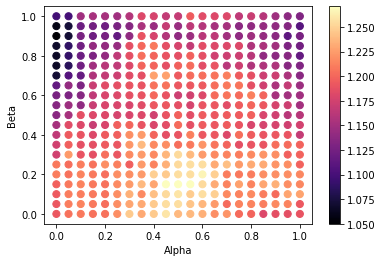

In [225]:
x = results['Alpha']
y = results['Beta']
z = results['Score']

f,ax = plt.subplots()

points = ax.scatter(x,y, c=z,s=50, cmap="magma")
plt.xlabel('Alpha')
plt.ylabel('Beta')
f.colorbar(points)

plt.show()

# Curve Optimization

In [32]:
from scipy.optimize import curve_fit

# Alpha

In [33]:
def func(x, a, b, c):
    return a*(x-b)**2+c

In [35]:
xdata = results.groupby('Alpha').mean().index
ydata = results.groupby('Alpha').mean()['Score']
popt, pcov = curve_fit(func, xdata, ydata, p0=[-0.15,  0.5,  1.2])

In [36]:
a_opt, b_opt, c_opt = popt
x_model = np.linspace(min(xdata),max(xdata),100)
y_model = func(x_model, a_opt, b_opt, c_opt)

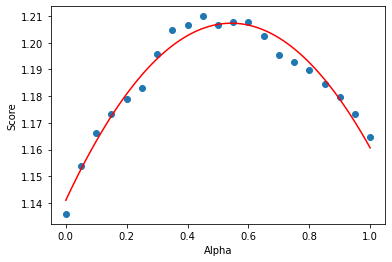

In [44]:
plt.scatter(xdata,ydata)
plt.plot(x_model,y_model, color= 'r')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.show()

In [39]:
alpha_opt = b_opt

0.5437587342271711

# Beta

In [178]:
from numpy import sin
from numpy import cos

In [208]:
def func_b(x, a, b, c, d):
    return a * sin(b-x) + c*x**3 + d

In [209]:
xdata_b = results.groupby('Beta').mean().index
ydata_b = results.groupby('Beta').mean()['Score']
popt_b, pcov_b = curve_fit(func_b, xdata_b, ydata_b)

In [210]:
a_opt_b, b_opt_b, c_opt_b,d_opt_b = popt_b
x_model_b = np.linspace(min(xdata_b),max(xdata_b),100)
y_model_b = func_b(x_model_b, a_opt_b, b_opt_b, c_opt_b, d_opt_b)

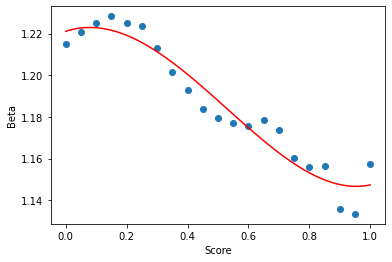

In [211]:
plt.scatter(xdata_b,ydata_b)
plt.plot(x_model_b,y_model_b, color= 'r')
plt.xlabel('Score')
plt.ylabel('Beta')
plt.show()

In [218]:
Local = pd.DataFrame()
Local['Beta'] = x_model_b
Local['Score'] = y_model_b

In [222]:
Local.loc[Local['Score'] == Local['Score'].max()]

,Beta,Score
8,0.080808,1.222941


In [1]:
beta_opt = Local.at[8,'Beta']
beta_opt

NameError: name 'Local' is not defined